# Lab-4


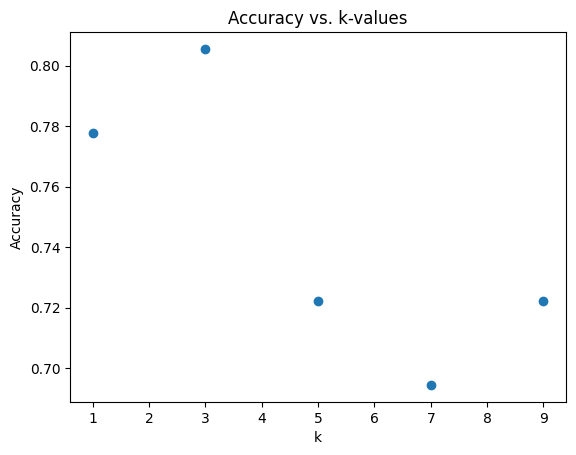

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load wine dataset
wine = load_wine()
featuresX,labelsY = wine.data, wine.target

# splitting the dataset
featresX_train, featuresX_test, labelsY_train, labelsY_test = train_test_split(featuresX, labelsY, test_size=0.2, random_state=42)

# define k values
k_values = [1,3,5,7,9]

accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(featresX_train, labelsY_train)
    accuracy = knn.score(featuresX_test, labelsY_test)
    accuracies.append(accuracy)

plt.scatter(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. k-values")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load wine dataset
wine = load_wine()
featuresX,labelsY = wine.data, wine.target

#splitting the datset
featresX_train, featuresX_test, labelsY_train, labelsY_test = train_test_split(featuresX,labelsY, test_size=0.2, random_state=42)

#define k values

k_values = range(1,30)

accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(featresX_train,  labelsY_train)
    y_pred = knn.predict(featuresX_test)
    accuracy = accuracy_score(labelsY_test, y_pred)
    accuracies.append(accuracy)
best_k = list(k_values)[accuracies.index(max(accuracies))]
print("best value of k", best_k)

best value of k 3


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

wine = load_wine()
featuresX,labelsY = wine.data, wine.target

featresX_train, featuresX_test, labelsY_train, labelsY_test = train_test_split(featuresX,labelsY, test_size=0.2, random_state=42)

p_values = [1,2,3,4,5]

accuracy_scores = []

for p in p_values:
    knn = KNeighborsClassifier(n_neighbors=5, p=p)
    knn.fit(featresX_train,  labelsY_train)
    y_pred = knn.predict(featuresX_test)
    accuracy = accuracy_score(labelsY_test, y_pred)
    accuracy_scores.append(accuracy)
    
print("Accuracy scores fro eac p value: ")
for p, accuracy in zip(p_values, accuracy_scores):
    print(f" p = {p} : {accuracy}")
print()

Accuracy scores fro eac p value: 
 p = 1 : 0.8055555555555556
 p = 2 : 0.7222222222222222
 p = 3 : 0.7222222222222222
 p = 4 : 0.7222222222222222
 p = 5 : 0.7222222222222222



# SVM


In [3]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
import warnings
from sklearn.model_selection import cross_val_score

warnings.filterwarnings("ignore")
df = pd.read_csv("./income_evaluation.csv")
df.head()

categorical_features = df.select_dtypes(include=["object"]).columns
numerical_features = df.select_dtypes(exclude=["object"]).columns

df = pd.get_dummies(df, columns=categorical_features,drop_first=True)
print(df.head())
A = df.drop("income_ >50K", axis=1)
B = df["income_ >50K"]

A_train, A_test, B_train, B_test = train_test_split(A,B, test_size=0.2, random_state=101)

scaler = StandardScaler()
A_train[numerical_features] = scaler.fit_transform(A_train[numerical_features])
A_test[numerical_features] = scaler.transform(A_test[numerical_features])

display(A_train.head())

svc= SVC(random_state=101)
svc.fit(A_train,B_train)

accuracyAB = cross_val_score(svc, A_train, B_train, cv = 5)
print("Train score: ", np.mean(accuracyAB))
print("Test Score: ", svc.score(A_test, B_test))

   age   fnlwgt   education-num   capital-gain   capital-loss  \
0   39    77516              13           2174              0   
1   50    83311              13              0              0   
2   38   215646               9              0              0   
3   53   234721               7              0              0   
4   28   338409              13              0              0   

    hours-per-week   workclass_ Federal-gov   workclass_ Local-gov  \
0               40                    False                  False   
1               13                    False                  False   
2               40                    False                  False   
3               40                    False                  False   
4               40                    False                  False   

    workclass_ Private   workclass_ Self-emp-inc  ...  \
0                False                     False  ...   
1                False                     False  ...   
2                

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
4400,-0.996110,-0.550200,-1.222152,-0.147881,-0.221529,-2.351924,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2598,0.181302,-0.077999,-0.427479,-0.147881,-0.221529,0.791095,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
496,-1.364051,0.666475,-0.030143,-0.147881,-0.221529,-0.036015,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4915,-1.511228,-0.028649,-1.222152,-0.147881,-0.221529,-1.690236,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1341,1.358714,-0.955980,1.559203,-0.147881,-0.221529,-0.036015,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


Train score:  0.8461355529131985
Test Score:  0.8488593155893536


# Voting Classifiers

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(A_train, B_train)

# Predict for a real sample from the test set
print("Voting prediction for first test sample:", voting_clf.predict([A_test.iloc[0]]))

from sklearn.metrics import accuracy_score
for clf in (log_clf, svm_clf, voting_clf):
    clf.fit(A_train, B_train)
    B_predict = clf.predict(A_test)
    print(clf.__class__.__name__, accuracy_score(B_test, B_predict))

Voting prediction for first test sample: [False]
LogisticRegression 0.8450570342205324
SVC 0.8488593155893536
VotingClassifier 0.846958174904943


# Activity-1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 1.Load dataset
df = pd.read_csv('./creditcard.csv')
print('Dataset shape:', df.shape)
print(df['Class'].value_counts())  


featuresX = df.drop('Class', axis=1)
labelsY = df['Class']


featresX_train, featuresX_test, labelsY_train, labelsY_test = train_test_split(featuresX, labelsY, test_size=0.2, stratify=labelsY, random_state=42)
print('\nTrain class distribution:')
print(labelsY_train.value_counts())
print('Test class distribution:')
print(labelsY_test.value_counts())


scaler = StandardScaler()
featresX_train = scaler.fit_transform(featresX_train)
featuresX_test = scaler.transform(featuresX_test)

# 2. Applying SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(featresX_train, labelsY_train)
print('\nAfter SMOTE, counts:')
print(pd.Series(y_res).value_counts())

# 4. KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_res, y_res)
y_pred = knn.predict(featuresX_test)
print('\nBaseline KNN (k=5) results on original test set:')
print('Accuracy:', accuracy_score(labelsY_test, y_pred))
print('F1-score:', f1_score(labelsY_test, y_pred))
print('\nClassification report:\n', classification_report(labelsY_test, y_pred, digits=4))

#5.
param_grid = {'n_neighbors': [3,5,7,9,11,15]}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, scoring='f1', cv=5, n_jobs=-1)
grid.fit(X_res, y_res)
print('\nGridSearchCV best params:', grid.best_params_)
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(featuresX_test)
print('\nBest KNN results on original test set:')
print('Accuracy:', accuracy_score(labelsY_test, y_pred_best))
print('F1-score:', f1_score(labelsY_test, y_pred_best))
print('\nClassification report:\n', classification_report(labelsY_test, y_pred_best, digits=4))

# Small confusion matrix print
print('\nConfusion matrix (best model):')
print(confusion_matrix(labelsY_test, y_pred_best))

# Activity-2

Dataset loaded!
Total samples: 253
Each image shape after flattening: 4096
Label counts:
 1    155
0     98
Name: count, dtype: int64

Training samples: 202
Testing samples: 51

Model Evaluations:
Accuracy: 0.8431372549019608

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.87      0.87      0.87        31

    accuracy                           0.84        51
   macro avg       0.84      0.84      0.84        51
weighted avg       0.84      0.84      0.84        51


Confusion Matrix:
 [[16  4]
 [ 4 27]]


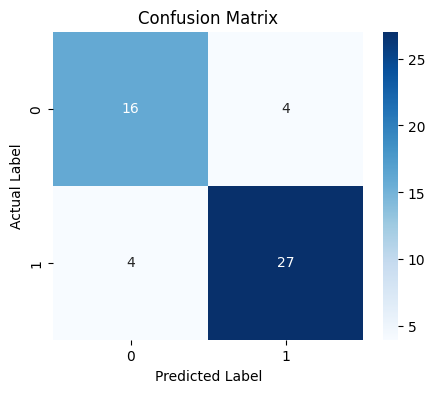

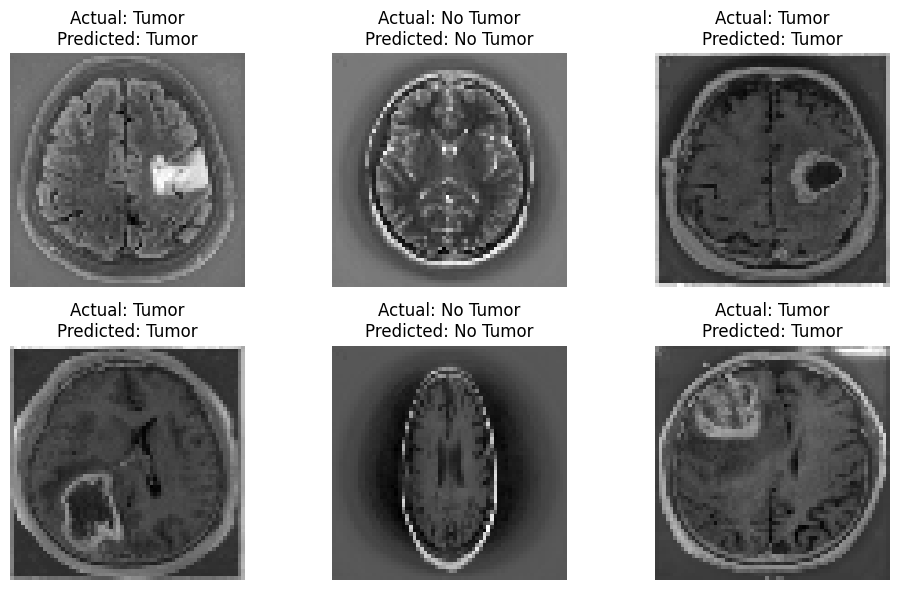

In [16]:
import os                       
import cv2                      
import numpy as np             
import pandas as pd             
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler      
from sklearn.svm import SVC                           
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
import matplotlib.pyplot as plt  
import seaborn as sns            

# 2. Loading dataset
data_dir = "./brain_tumor_dataset"

# Create images list and their labels list
images = []
labels = []

# Looping through both 'yes' and 'no' folders
for label in ['yes', 'no']:
    folder_path = os.path.join(data_dir, label)
    
    # Loop through all images inside each folder
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        
        # 3. Preprocessing each image
        
        img = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_resized = cv2.resize(img_gray, (64, 64))
        img_flat = img_resized.flatten()
        images.append(img_flat)
        labels.append(1 if label == 'yes' else 0)  

# 4. Converting lists in arrays

featuresX = np.array(images)   
labelsY = np.array(labels)   

print("Dataset loaded!")
print("Total samples:", featuresX.shape[0])
print("Each image shape after flattening:", featuresX.shape[1])
print("Label counts:\n", pd.Series(labelsY).value_counts())

#  5. Splitting datasets 

featresX_train, featuresX_test, labelsY_train, labelsY_test = train_test_split(featuresX, labelsY, test_size=0.2, random_state=42, stratify=labelsY)

print("\nTraining samples:", featresX_train.shape[0])
print("Testing samples:", featuresX_test.shape[0])

# 6. Normalize features using StandardScaler

scaler = StandardScaler()
featresX_train = scaler.fit_transform(featresX_train)
featuresX_test = scaler.transform(featuresX_test)

#  7. Training SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(featresX_train, labelsY_train)

# 8. Makig predictions 
y_pred = svm_model.predict(featuresX_test)

# 9. Evaluating model 
print("\nModel Evaluations:")
print("Accuracy:", accuracy_score(labelsY_test, y_pred))
print("\nClassification Report:\n", classification_report(labelsY_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(labelsY_test, y_pred))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(labelsY_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

# 10. Displaying some images

plt.figure(figsize=(10, 6))
for i in range(6):  
    index = np.random.randint(0, len(featuresX_test))
    img = featuresX_test[index].reshape(64, 64)  
    plt.subplot(2, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"Actual: {'Tumor' if labelsY_test[index]==1 else 'No Tumor'}\nPredicted: {'Tumor' if y_pred[index]==1 else 'No Tumor'}")
    plt.axis('off')

plt.tight_layout()
plt.show()
